## ライブラリのインポート

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
image_path = "Lenna.jpg"


## 課題 1: 画像の読み込みと表示

### 課題説明

1. ローカルに保存されている任意の画像ファイルを読み込んでください。
2. 画像をカラー（RGB形式）とグレースケール形式の両方で表示してください。
3. `Matplotlib` を使ってタイトルを付け、軸を非表示にしてください。


### 作成したコード

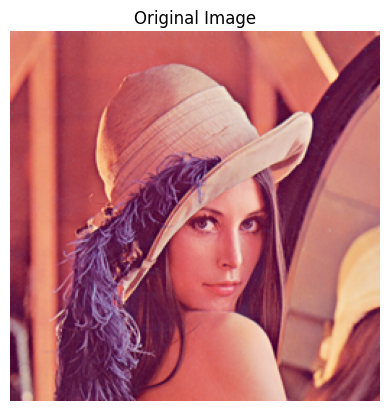

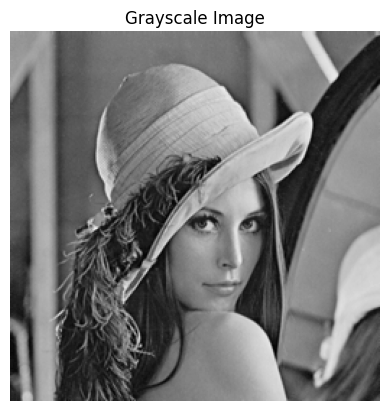

In [34]:
image = cv2.imread(image_path)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_cv = cv2.imread(image_path)

plt.imshow(gray_image, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()


## 課題 2: 二値化処理


### 課題説明

1. グレースケール画像を使って、以下の二値化処理を行ってください。
   - 固定閾値（128）を使った二値化
   - OpenCVの `THRESH_BINARY` を使った二値化
2. 二値化された画像をそれぞれ表示し、違いを比較してください。

### 作成したコード

#### 課題2-1

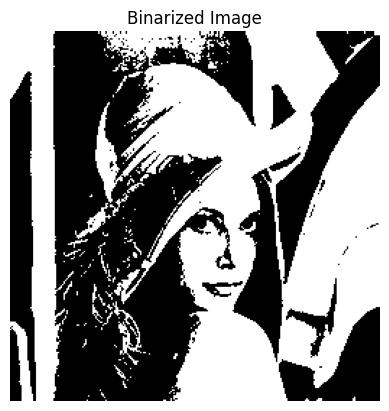

Otsuの方法による閾値: 116.0


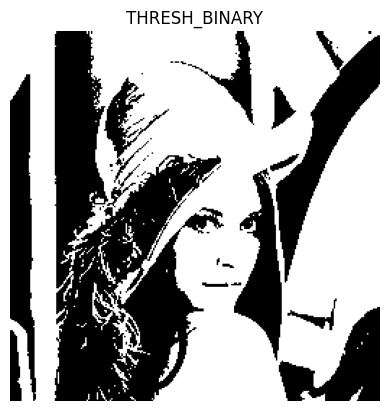

In [35]:
# 固定閾値（128）を使った二値化
_, binary_image = cv2.threshold(gray_image, 128, 255,cv2.THRESH_BINARY)

plt.imshow(binary_image, cmap='gray')
plt.title("Binarized Image")
plt.axis("off")
plt.show()

# OpenCVの `THRESH_BINARY` を使った二値化
otsu_thresh, thresh_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

print(f"Otsuの方法による閾値: {otsu_thresh}")

plt.imshow(thresh_image, cmap='gray')
plt.title("THRESH_BINARY")
plt.axis("off")
plt.show()

#### 課題2-2

固定閾値を使った画像に比べて、そうでない画像における白の部分の割合が大きくなった
これはTHRESH_BINARYを使った方の閾値が固定式位置である128より低くなったためと思われる


## 課題 3: 画像の拡大縮小

1. 任意の画像を読み込んでください。
   
   今回は以下の画像を読み込んだ
   
   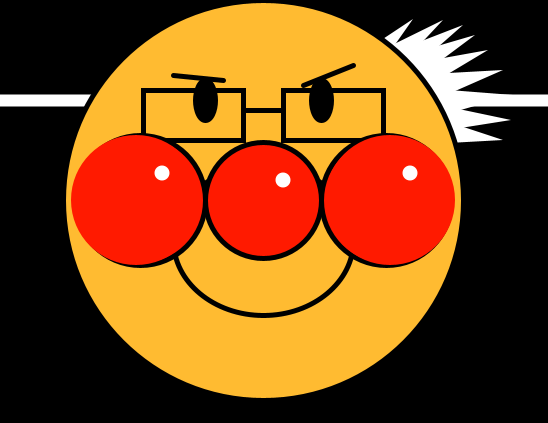
2. 以下の条件で画像を拡大または縮小してください：
   - 幅と高さを2倍に拡大
   - 幅と高さを半分に縮小
3. 結果の画像を表示し、元の画像と比較してください。


作成したコード

下に表示されている画像の縦横サイズは、1096 x 846


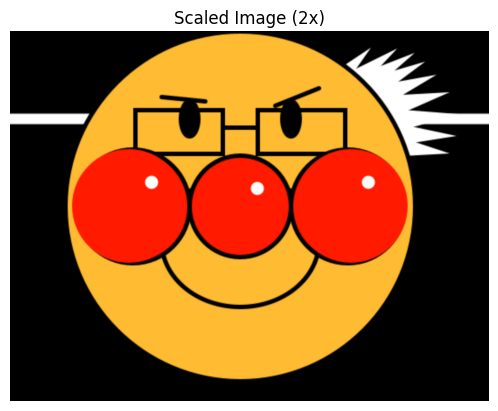

下に表示されている画像の縦横サイズは、274 x 211


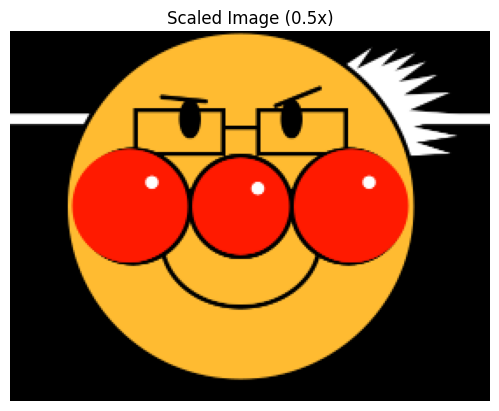

In [36]:
# 画像の拡大縮小
image_path2 = "./fig/kadai3.png"
image = cv2.imread(image_path2)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
expansion_ratio = 2  # 拡大率(大きい値を指定するととんでもない時間がかかるので注意)
hanbun_ratio = 0.5  # 縮小率
scaled_image = cv2.resize(image, (int(image.shape[1] * expansion_ratio), int(image.shape[0] * expansion_ratio)))  # 2倍に拡大
hanbun_image=cv2.resize(image, (int(image.shape[1] * hanbun_ratio), int(image.shape[0] * hanbun_ratio)))  # 1/2倍に縮小
# 画像のサイズを表示
print(f"下に表示されている画像の縦横サイズは、{scaled_image.shape[1]} x {scaled_image.shape[0]}")

plt.imshow(scaled_image, cmap='gray')
plt.title(f"Scaled Image ({expansion_ratio}x)")
plt.axis("off")
plt.show()

print(f"下に表示されている画像の縦横サイズは、{hanbun_image.shape[1]} x {hanbun_image.shape[0]}")
plt.imshow(hanbun_image, cmap='gray')
plt.title(f"Scaled Image ({hanbun_ratio}x)") 
plt.axis("off")
plt.show()


#### 2
パッと見は一緒

よく見ると下の方が良く見ると画質が悪い

下の画像の画素が半分になっており、それを拡大しているため画質が悪くなっている


## 課題 4: エッジ検出

1. 任意の画像をグレースケールに変換してください。

以下の画像を読み込んだ

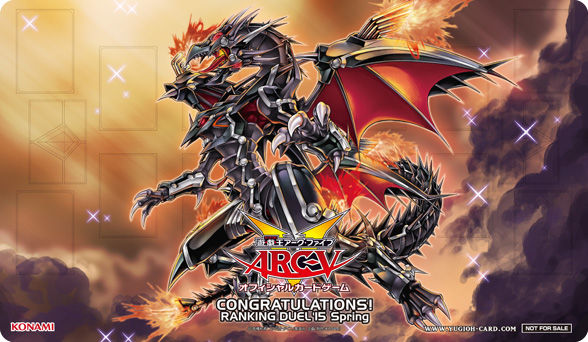

2. OpenCVの `Canny` 関数を使ってエッジ検出を行ってください。
3. エッジ検出の結果を表示し、元の画像と比較してください。


#### 作成したコード

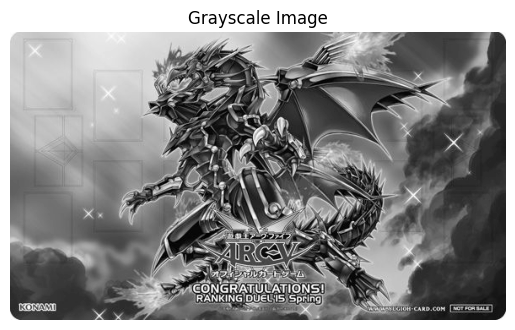

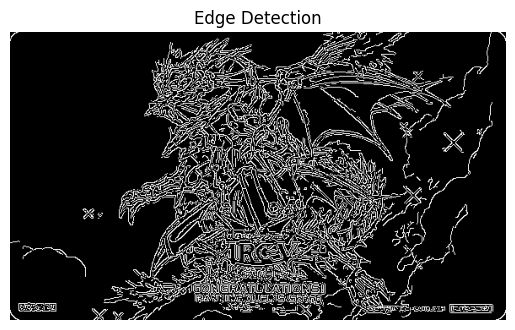

In [37]:
image_path3 = "./fig/kadai4.jpg"
image = cv2.imread(image_path3)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_image, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()
edges = cv2.Canny(gray_image, 100, 200)

plt.imshow(edges, cmap="gray")
plt.title("Edge Detection")
plt.axis("off")
plt.show()


#### 元画像とエッジ画像の比較

かっこいい

変化の小さい境界線の所はエッジが無かった


## 課題 5: 周波数領域でのフィルタリング

1. 任意の画像をフーリエ変換（DFT）し、そのスペクトル画像を表示してください。

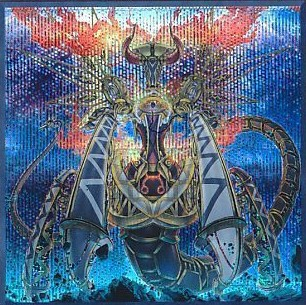

この画像を使用する


2. 低周波フィルタを適用して画像を平滑化してください。

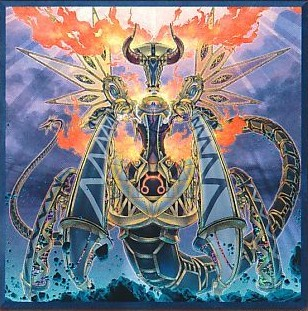

この画像に近くなれば幸いである

3. 結果の画像を表示し、元の画像と比較してください。


#### 作成したコード

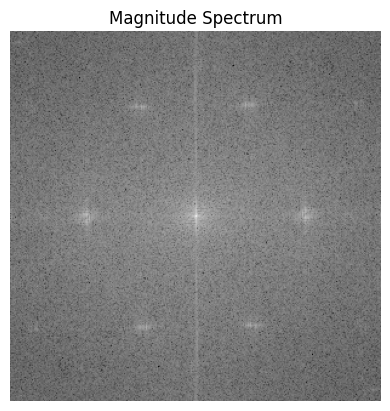

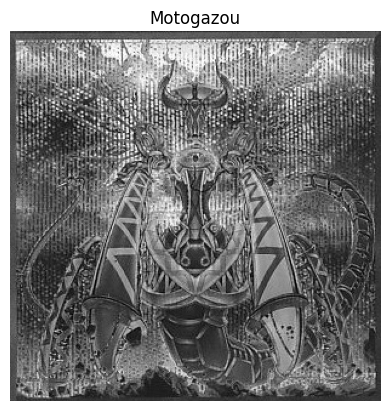

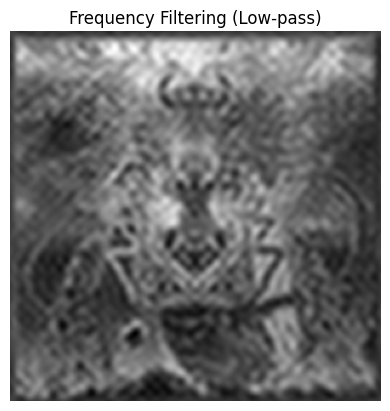

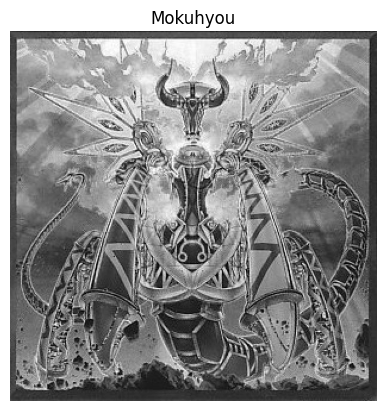

In [41]:
# 画像の読み込み
image_path4 = "./fig/kadai5_2.jpg"
image = cv2.imread(image_path4, 0)  # グレースケールで読み込む

# フーリエ変換
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

# スペクトル画像の計算
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

# スペクトル画像の表示
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')
plt.show()

dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

# マスク作成
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# フィルタ適用
filtered_dft = dft_shift * mask
dft_ishift = np.fft.ifftshift(filtered_dft)
filtered_image = cv2.idft(dft_ishift)
filtered_image = cv2.magnitude(filtered_image[:, :, 0], filtered_image[:, :, 1])


plt.imshow(image, cmap="gray")
plt.title("Motogazou")
plt.axis("off")
plt.show()

plt.imshow(filtered_image, cmap='gray')
plt.title("Frequency Filtering (Low-pass)")
plt.axis("off")
plt.show()

image_path5 = "./fig/kadai5_1.jpg"
image = cv2.imread(image_path5, 0)  # グレースケールで読み込む
plt.imshow(image, cmap="gray")
plt.title("Mokuhyou")
plt.axis("off")
plt.show()




フィルタリングして平滑化した結果、元画像にあった線はある程度消えた

元画像にあった線がぼやけてしまった

目標画像にはあまり近づかなかった印象を受けた


## 課題 6: カスタムフィルタの作成

1. 3x3のカーネルを使って、独自の空間フィルタを設計してください。
2. そのフィルタを任意の画像に適用し、結果を表示してください。
3. 結果の画像が元の画像にどのような影響を与えたか考察してください。


#### 作成したコード

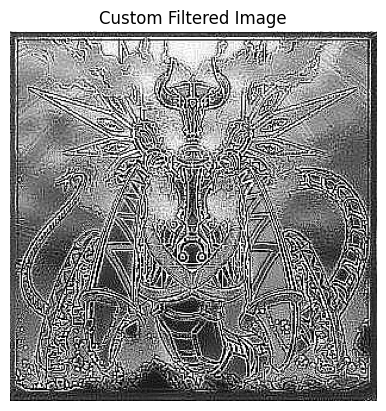

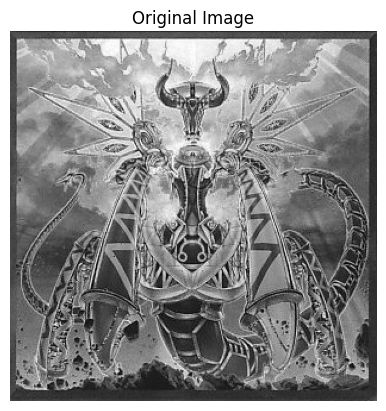

In [43]:
# 3x3のカーネルを定義
kernel = np.array([[1, 1, 1],
                   [1, -7, 1],
                   [1, 1, 1]])

# カーネルを画像に適用
filtered_image_custom = cv2.filter2D(image, -1, kernel)

# 結果の画像を表示
plt.imshow(filtered_image_custom, cmap='gray')
plt.title("Custom Filtered Image")
plt.axis("off")
plt.show()
# 結果の画像を表示
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")
plt.show()


#### 元画像との比較

色の違いが大きい境界線が白くなり、グラデーションの部分、色が同じ範囲の部分はそのままとなった